# Introduction to Unsupervised machine learning with Scikitlearn

<a rel="license" href="https://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="width=50" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Authors:    
Dr Antonia Mey, Dr Matteo Degiacomi

Emails:    
antonia.mey@ed.ac.uk, matteo.t.degiacomi@durham.ac.uk

Content is partially adapted from the [Software Carpentries Machine learning lesson](https://carpentries-incubator.github.io/machine-learning-novice-sklearn/index.html) and [here](https://github.com/christianversloot/machine-learning-articles/blob/main/performing-dbscan-clustering-with-python-and-scikit-learn.md).
 


## Learning outcomes:
### Questions
How can we use clustering to find data points with similar attributes?
### Objectives
- Identify clusters in data using **k-means** clustering, **DB-scan** and **spectral clustering**. 
- See the limitations of k-means when clusters overlap.
- Use spectral clustering to overcome the limitations of k-means.

**Jupyter cheat sheet**:
- to run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- to get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

## Clustering

Clustering is the grouping of data points which are similar to each other. It can be a powerful technique for identifying patterns in data. Clustering analysis does not usually require any training and is known as an unsupervised learning technique. The lack of a need for training means it can be applied quickly.

## Applications of Clustering

- Looking for trends in data
- Data compression, all data clustering around a point can be reduced to just that point. For example, reducing colour depth of an image.
- Pattern recognition

## K-means Clustering

The K-means clustering algorithm is a simple clustering algorithm that tries to identify the centre of each cluster. It does this by searching for a point which minimises the distance between the centre and all the points in the cluster. The algorithm needs to be told how **many clusters** to look for, but a common technique is to try different numbers of clusters and combine it with other tests to decide on the best combination.

## K-means with Scikit Learn

To perform a k-means clustering with Scikit learn, we first need to import the sklearn.cluster module.

In [9]:
import sklearn.cluster as skl_cluster
import numpy as np

For this example, we’re going to use scikit learn’s built in random data blob generator instead of using an external dataset. For this we’ll also need the `sklearn.datasets.samples_generator` module.

In [3]:
import sklearn.datasets as skl_datasets

Now let’s create some random blobs using the make_blobs function. The `n_samples` argument sets how many points we want to use in all of our blobs. `cluster_std` sets the standard deviation of the points, the smaller this value the closer together they will be. `centers` sets how many clusters we’d like. `random_state` is the initial state of the random number generator, by specifying this we’ll get the same results every time we run the program. If we don’t specify a random state then we’ll get different points every time we run. This function returns two things, an array of data points and a list of which cluster each point belongs to.

In [4]:
data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=0.75, centers=4, random_state=1)

### Plotting the data
We have now created the data, let's have a look at what make_blobs gives us!

In [12]:
np.shape(data)

(400, 2)

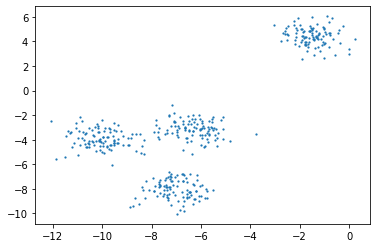

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0)

Let's identify the clusters using K-means. First, we need to initialise the `KMean`s module and tell it how many clusters to look for. Next, we supply it some data via the `fit` function. Finally, we run the predict function to find the clusters.

In [15]:
# 1. Initialise Kemans
Kmean = skl_cluster.KMeans(n_clusters=4)
# 2. Fit the data
Kmean.fit(data)
# 3. Predict the clusters
clusters = Kmean.predict(data)

The data can now be plotted to show all the points we randomly generated. To make it clearer which cluster points have been classified to we can set the colours (the c parameter) to use the clusters list that was returned by the predict function. The Kmeans algorithm also lets us know where it identified the centre of each cluster as. These are stored as a list called `cluster_centers_` inside the `Kmean` object. Let’s go ahead and plot the points from the clusters, colouring them by the output from the K-means algorithm, and also plot the centres of each cluster as a red triangle.

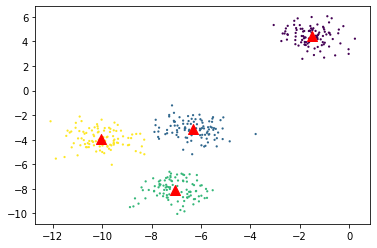

In [20]:
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='^')
plt.show()

<div class="alert alert-info">
<b>Working in multiple dimensions:</b>
Although this example shows two dimensions the kmeans algorithm can work in more than two dimensions, it just becomes very difficult to show this visually once we get beyond 3 dimensions. Its very common in machine learning to be working with multiple variables and so our classifiers are working in multi-dimensional spaces.
</div>


## Task section
Please work in small groups for the next 15 minutes on the tasks below

<div class="alert alert-success">
<b>Task 1: Discuss: </b> </div>
    What are the limitations and advantages of K-Means?


<details>
<summary> <mark> Solution: Suggested limitations and advantages</mark> </summary>

Limitations:
- Requires number of clusters to be known in advance
- Struggles when clusters have irregular shapes
- Will always produce an answer finding the required number of clusters even if the data isn’t clustered (or clustered in that many clusters).
- Requires linear cluster boundaries

Advantages:
- Simple algorithm, fast to compute. A good choice as the first thing to try when attempting to cluster data.
- Suitable for large datasets due to its low memory and computing requirements.

</details>

<div class="alert alert-success">
<b>Task 2: K-means with overlapping clusters </b> </div>
    Adjust the program below to increase the standard deviation of the blobs (the cluster_std parameter to make_blobs) and increase the number of samples (n_samples) to 4000. You should start to see the clusters overlapping. Do the clusters that are identified make sense? Is there any strange behaviour from this?
    
```Python
data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=0.75, centers=4, random_state=1)

Kmean = skl_cluster.KMeans(n_clusters=4)
Kmean.fit(data)
clusters = Kmean.predict(data)

plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='^')

```


In [56]:
## Your solution here:


<details>
<summary> <mark> Solution: Try it yourself</mark> </summary>

```Python
data, cluster_id = skl_datasets.make_blobs(n_samples=4000, cluster_std=3.0, centers=4, random_state=1)

Kmean = skl_cluster.KMeans(n_clusters=4)
Kmean.fit(data)
clusters = Kmean.predict(data)

plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='^')
```

</details>

<div class="alert alert-success">
<b>Task 3: How many clusters should we look for? </b> </div>
As K-Means requires us to specify the number of clusters to expect a common strategy to get around this is to vary the number of clusters we are looking for. Modify the program to loop through searching for between 2 and 10 clusters. Which (if any) of the results look more sensible? What criteria might you use to select the best one?



In [27]:
## Your solution here:




<details>
<summary> <mark> Solution: Try it yourself</mark> </summary>

```Python
for cluster_count in range(2,11):
    Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
    Kmean.fit(data)
    clusters = Kmean.predict(data)
    plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0,c=clusters)
    for cluster_x, cluster_y in Kmean.cluster_centers_:
        plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='^')
        # give the graph a title with the number of clusters
        plt.title(str(cluster_count)+" Clusters")
    plt.show()
```
None of these look very sensible clusterings because all the points really form one large cluster. We might look at a measure of similarity of the cluster to test if its really multiple clusters. A simple standard deviation or interquartile range might be a good starting point.

</details>

## DBSCAN a density based clustering scheme

A common clustering problem are two concentric rings. scikit learn has an inbuilt version of generating data for this, similar to the `make_blobs` function.

In [29]:
import sklearn.datasets as skl_data
circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

Le'ts plot the data to see what it looks like

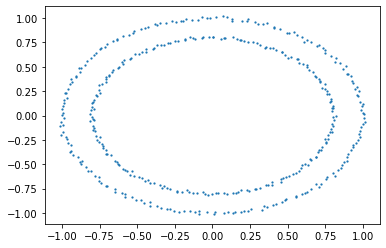

In [31]:
plt.scatter(circles[:, 0], circles[:, 1], s=5, linewidth=0)

What happens if we use k-means to cluster this data?

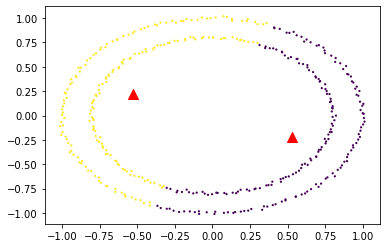

In [34]:
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

plt.scatter(circles[:, 0], circles[:, 1], s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='^')

Oh dear....this is not ideal

Let's try the same thing with DBSCAN

In [70]:
db = skl_cluster.DBSCAN(eps=0.1)
db.fit(circles)
clusters = db.labels_.astype(int)
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print(f'Estimated no. of clusters: {no_clusters}')
print(f'Estimated no. of noise points: {no_noise}')

Estimated no. of clusters: 2
Estimated no. of noise points: 0


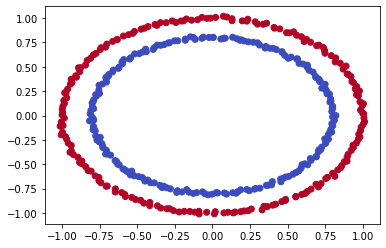

In [54]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', clusters))
plt.scatter(circles[:,0], circles[:,1], c=colors, marker="o", picker=True)

## Task section
Please work in small groups for the next 15 minutes on the tasks below

<div class="alert alert-success">
<b>Task 1: What happens when you change the epsilon value of DBSCAN? </b> </div>
For the two rings it is quite obvious that you want two clusters to describe this. DBSCAN can be used to identify different numbers of clusters. Play around with the epsilon value to figure out at which point DBSCAN may fail in classifying the two rings. 

In [ ]:
## Your solution here:


<details>
<summary> <mark> Solution: Try it yourself</mark> </summary>
    
```Python
epsilon = np.linspace(0.05,0.3,10)
for eps in epsilon:
    db = skl_cluster.DBSCAN(eps=eps)
    db.fit(circles)
    clusters = db.labels_.astype(int)
    no_clusters = len(np.unique(clusters) )
    no_noise = np.sum(np.array(clusters) == -1, axis=0)
    print(f'=========== Current epsilon value is: {eps:.2f} ==========')
    print(f'Estimated no. of clusters: {no_clusters}')
    print(f'Estimated no. of noise points: {no_noise}')
```
</details>

<div class="alert alert-success">
<b>Task 2: Can spectral clustering also recognise the two rings? </b> </div>

You have seen that k-means is bad at distinguishing the two rings. DBSCAN did manage to do this with a well chosen epislon value. Another method called spectral clustering can also be used to cluster data. Look at the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) and see if you can get the spectral clustering method to work for the ring dataset. 

In [69]:
## Your solution here:


<details>
<summary> <mark> Solution: Try it yourself</mark> </summary>

The code for calculating the SpectralClustering is very similar to the kmeans clustering, instead of using the `sklearn.cluster.KMeans` class we use the `sklearn.cluster.SpectralClustering` class.

The `SpectralClustering` class combines the `fit` and `predict` functions into a single function called `fit_predict`.
This is how the solution for clustering the dataset using Spectral clustering looks like:

```Python
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=1000, noise=.01, random_state=0)

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
#colors = list(map(lambda x: '#3b7cc0' if x == 1 else '#111426', labels))
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels)
plt.show()
```
    
</details>

<div class="alert alert-success">
<b>Task 3 (Optional): Performance of clustering algorithms. </b> </div>

Combine the code from the k-means clustering we have shown above for the two circles and your solution to task to using the spectral clustering. Using the `time` module, time how long both clustering algorithms take to run. To get the start time, get something like `start_time = time.time()`. At the end of the clustering snipptet part for each clustering method get `finish_time` in the same way as `start_time`. Subtracting each of the time components you can figure out how long the spectral and k-means clustering takes. Compare how long both parts take to run generating 4,000 samples and testing them for between 2 and 10 clusters. How much did your run times differ? How much do they differ if you increase the number of samples to 8,000? How long do you think it would take to compute 800,000 samples (estimate this, it might take a while to run for real)?

<details>
<summary> <mark> Solution: Try it yourself</mark> </summary>

KMeans version, runtime around 4 seconds (your computer might be faster/slower)

```Python
import matplotlib.pyplot as plt
import sklearn.cluster as skl_cluster
from sklearn.datasets import make_blobs 
import time

start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
    Kmean.fit(data)
    clusters = Kmean.predict(data)

    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=clusters)
    plt.title(str(cluster_count)+" Clusters")

plt.show()

end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")
```
Spectral version, runtime around 9 seconds (your computer might be faster/slower)
    
```Python
import matplotlib.pyplot as plt
import sklearn.cluster as skl_cluster
from sklearn.datasets import make_blobs 
import time

start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    model = skl_cluster.SpectralClustering(n_clusters=cluster_count,
                                       affinity='nearest_neighbors',
                                       assign_labels='kmeans')
    labels = model.fit_predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=labels)
    plt.title(str(cluster_count)+" Clusters")
plt.show()
end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")
    
```
    
When the number of points increases to 8000 the runtimes are 24 seconds for the spectral version and 5.6 seconds for kmeans. The runtime numbers will differ depending on the speed of your computer, but the relative different should be similar. For 4000 points kmeans took 4 seconds, spectral 9 seconds, 2.25 fold difference. For 8000 points kmeans took 5.6 seconds, spectral took 24 seconds. 4.28 fold difference. Kmeans 1.4 times slower for double the data, spectral 2.6 times slower. The realative difference is diverging. Its double by doubling the amount of data. If we use 100 times more data we might expect a 100 fold divergence in execution times. Kmeans might take a few minutes, spectral will take hours.
    
</details>

## Dihedral space of alanine dipeptide
Alanine dipeptide is a commonly used toy model in molecular simulations.

In [1]:
# Some imports required to view alanine dipeptide
import nglview as nv
import warnings
import os
import MDAnalysis as mda
import numpy as np
warnings.filterwarnings("ignore")

Let us load alanine dipeptide into nglview to look at the molecule a bit more

In [2]:
adp = mda.Universe(os.path.join('data','alanine-dipeptide-nowater.pdb' ))
w = nv.show_mdanalysis(adp)
w

NGLWidget()

In [3]:
temp = np.load('data/alanine-dipeptide-3x250ns-backbone-dihedrals.npz',mmap_mode='r')
dihedral = []
for k in temp.files:
    dihedral.append(temp[k])
dihedral_data = np.concatenate(dihedral)

## Plotting the dihedral space
`dihedral_data` contains the $\phi$ and $\psi$ dihedral angles of 3 250 ns trajectories. 

Text(0, 0.5, '$\\psi$ in [rad]')

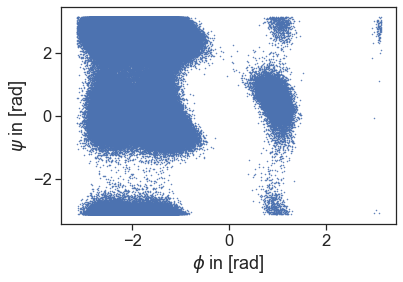

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

plt.plot(dihedral_data[:,0], dihedral_data[:,1], lw=0, marker='o', ms=0.5)
plt.xlabel(r'$\phi$ in [rad]')
plt.ylabel(r'$\psi$ in [rad]')

<div class="alert alert-success">
<b>Task 1: What would be a better way to represent this data than a scatter plot? </b> </div>


<div class="alert alert-success">
<b>Task 2: Try using k-means clustering for the dataset. </b> </div>
2.1. What do you think is the right number of cluster centers?
2.2. Can you spot a problem with the clustering of this dataset?


<div class="alert alert-success">
<b>Task 3:  </b> </div>


In [ ]:
# Tasks
1. Can you plot a density?
2. Try different clustering for the dataset?
3. What is the problem with the data?

or we could plot this as a density

In [11]:
Kmean = skl_cluster.KMeans(n_clusters=100)
Kmean.fit(dihedral_data)
clusters = Kmean.predict(dihedral_data)

Text(0, 0.5, '$\\psi$ in [rad]')

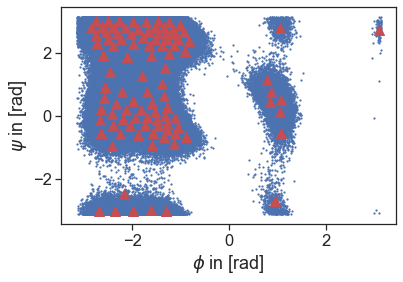

In [15]:
plt.scatter(dihedral_data[:, 0], dihedral_data[:, 1], s=5, linewidth=0)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='^')
plt.xlabel(r'$\phi$ in [rad]')
plt.ylabel(r'$\psi$ in [rad]')

In [ ]:
# Periodicity!!!

In [29]:
db = skl_cluster.DBSCAN(eps=0.2)
db.fit(data_set[::10])
clusters = db.labels_.astype(int)
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print(f'Estimated no. of clusters: {no_clusters}')
print(f'Estimated no. of noise points: {no_noise}')

Estimated no. of clusters: 8
Estimated no. of noise points: 24


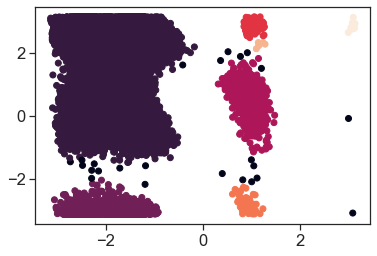

In [30]:
#colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', clusters))
plt.scatter(data_set[::10,0], data_set[::10,1], c=clusters, marker="o", picker=True)

In [ ]:
## What happens when we cluster ADP with k-means, DB scan or spectral clustering?

<div class="alert alert-info">
<b>Key points:</b></div>   

- Clustering is a form of unsupervised learning   
- Unsupervised learning algorithms don’t need training   
- Kmeans is a popular clustering algorithm.   
- Kmeans struggles where one cluster exists within another, such as concentric circles.   
- DBSCAN and Spectral clustering are two other technique which can overcome some of the limitations of Kmeans.    
- Spectral clustering is much slower than Kmeans.  
- Different clustering methods can also be applied to real world data such as alanine-dipeptide. 
- As well as providing machine learning algorithms scikit learn also has functions to make example data   


## Next Notebook

[Regressions](ML_regression_02.ipynb)